In [1]:
import pandas as pd

In [4]:
loans = pd.read_csv("d:\loan\loan.csv",low_memory=False)

In [5]:
print(loans.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [9]:
print(loans.columns.tolist())

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_pr

In [14]:
for column in loans.columns:
    print(column)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

In [15]:
import matplotlib.pyplot as plt

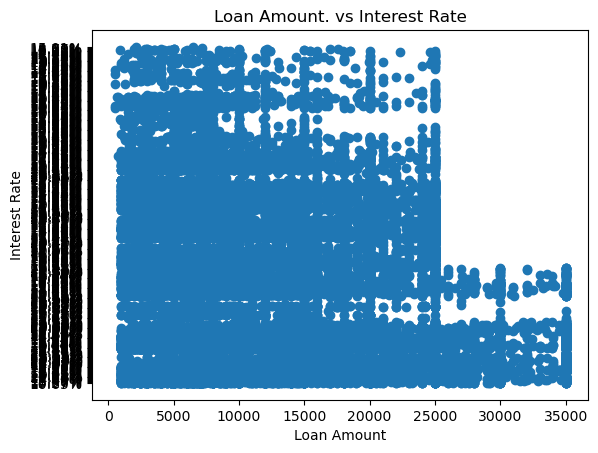

In [16]:
loan_amnt=loans["loan_amnt"]
int_rate=loans["int_rate"]
plt.scatter(loan_amnt,int_rate)
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Loan Amount. vs Interest Rate')
plt.show()

In [21]:
loan_dist = loans['loan_amnt'].value_counts().reset_index()

In [22]:
print(loan_dist)

     index  loan_amnt
0    10000       2833
1    12000       2334
2     5000       2051
3     6000       1908
4    15000       1895
..     ...        ...
880  22875          1
881   8175          1
882  19475          1
883  21225          1
884  22550          1

[885 rows x 2 columns]


In [20]:
print(type(loan_dist))

<class 'pandas.core.frame.DataFrame'>


In [29]:
print(loans["loan_amnt"].min(),loans["loan_amnt"].max(),loans["loan_amnt"].sum() )

500 35000 445602650


In [30]:
print(loans["int_rate"].min(),loans["int_rate"].max() )

10.00% 9.99%


In [27]:
loans['int_rate_n'] = loans['int_rate'].str.replace('%','').astype(float)

In [28]:
print(loans["int_rate_n"].min(),loans["int_rate_n"].max() )

5.42 24.59


In [31]:
loan_amnt_bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000]

In [32]:
loans["loan_amnt_range"]=pd.cut(loans['loan_amnt'],bins=loan_amnt_bins)

In [38]:
 loan_range_counts = loans['loan_amnt_range'].value_counts().sort_index()

In [37]:
int_rate_bins = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]

In [39]:
loans["int_rate_range"]=pd.cut(loans['int_rate_n'],bins=int_rate_bins)

In [40]:
int_rate_counts = loans['int_rate_range'].value_counts().sort_index()

In [41]:
print(int_rate_counts)

(0.0, 2.5]         0
(2.5, 5.0]         0
(5.0, 7.5]      5377
(7.5, 10.0]     7016
(10.0, 12.5]    9650
(12.5, 15.0]    9144
(15.0, 17.5]    5331
(17.5, 20.0]    2327
(20.0, 22.5]     794
(22.5, 25.0]      78
Name: int_rate_range, dtype: int64


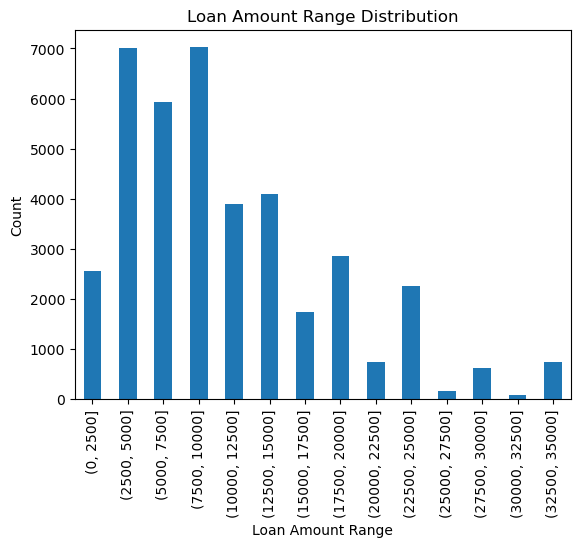

In [49]:
# Calculate the loan amount range counts and sort by loan amount range
loan_range_counts = loans['loan_amnt_range'].value_counts().sort_index()

# Plot the loan amount range counts as a bar graph
loan_range_counts.plot(kind='bar')

# Set labels and title for the plot
plt.xlabel('Loan Amount Range')
plt.ylabel('Count')
plt.title('Loan Amount Range Distribution')

# Display the plot
plt.show()

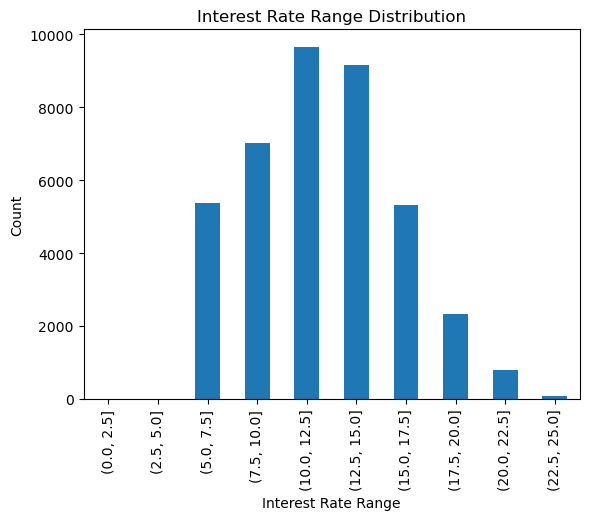

In [51]:
# Calculate the Interest rate range counts and sort by Interest rate range.
int_rate_range_counts = loans['int_rate_range'].value_counts().sort_index()

# Plot the Interest Rate range counts as a bar graph
int_rate_range_counts.plot(kind='bar')

# Set labels and title for the plot
plt.xlabel('Interest Rate Range')
plt.ylabel('Count')
plt.title('Interest Rate Range Distribution')

# Display the plot
plt.show()